インピーダンス角を入力してください0


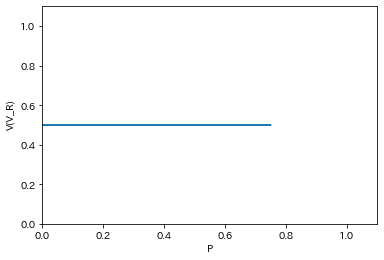

In [2]:
"""複数のグラフを重ねて描画するプログラム"""
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import math #度数法を使用できるようにする
PI = np.pi  # 円周率をPIで使えるようにする


fig, ax = plt.subplots()

# delta の範囲
delta = np.linspace(0, 2*PI, 1000000)
alpha= math.radians(int(input("インピーダンス角を入力してください")))
Z= 1.0 #インピーダンスの大きさを1p.u.とした。

E_s=0.5 #単位法で受電端電圧、送電端電圧それぞれ1.0[p.u.]で固定してある。
E_r=1.0

#送電端電圧の複素表示
E_s1=E_s*(np.cos(delta)+1j*np.sin(delta))

#複素インピーダンス
Z_1=Z*(np.cos(alpha)+1j*np.sin(alpha))

#複素電流
I=(E_s1-E_r)/Z_1
#共役複素電流
I_var=I.conjugate()
#受電端、送電端複素電流
S_r=E_r*I_var
S_s=E_s1*I_var
#実部、虚部の分解
P_r=S_r.real
Q_r=S_r.imag

P_s=S_s.real
Q_s=S_s.imag


V=abs(E_s1)
P=P_s

plt.xlabel("P")
plt.ylabel("V(V_R)")


plt.xlim(0,1.1*E_r) #x軸の範囲
plt.ylim(0,1.1*E_r) #y軸の範囲
plt.plot(P,V)
plt.show()



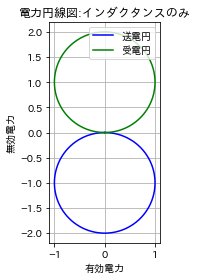

In [6]:
"""インダクタンスのみの送配電モデル"""
#送配電電圧と受電端電圧の大きさが普遍で1.0p.u.である場合（単位法）
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
PI = np.pi  # 円周率をPIで使えるようにする



fig, ax = plt.subplots()

# delta の範囲
delta = np.linspace(0, 2*PI, 10000)

X= 1.0


E_s=1.0
E_r=1.0

#送電端電圧の複素表示
E_s1=E_s*(np.cos(delta)+1j*np.sin(delta))

I=(E_s1-E_r)/(1j*X)


#共役複素電流
I_var=I.conjugate()
#受電端、送電端複素電流
S_r=E_r*I_var
S_s=E_s1*I_var
#実部、虚部の分解
P_r=S_r.real
Q_r=S_r.imag

P_s=S_s.real
Q_s=S_s.imag






# 関数を記述
# P_r = np.sin(delta)/X
# Q_r = (1-np.cos(delta))/X

# P_s = np.sin(delta)/X
# Q_s = (-1+np.cos(delta))/X

c1,c2 = "blue","green"    # 各プロットの色
l1,l2 = "送電円","受電円"  # 各ラベル

ax.set_xlabel('有効電力')  # x軸ラベル
ax.set_ylabel('無効電力')  # y軸ラベル
ax.set_title("電力円線図:インダクタンスのみ") # グラフタイトル
ax.set_aspect('equal') # スケールを揃える
ax.grid()            # 罫線
#ax.set_xlim([-10, 10]) # x方向の描画範囲を指定
#ax.set_ylim([0, 1])    # y方向の描画範囲を指定
ax.plot(P_r, Q_r, color=c1, label=l1)
ax.plot(P_s, Q_s, color=c2, label=l2)

ax.legend(loc=0)    # 凡例
fig.tight_layout()  # レイアウトの設定
# plt.savefig('hoge.png') # 画像の保存
plt.show()